# Safe Random Forest Notebook 
### First set some path variables: this notebook expects to find the repository root in your home directory. You can change this by editing the last sys.path.append line to reflect with the repository root is found on your system

In [1]:
import sys
import os

from os.path import expanduser

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("")))
sys.path.append(ROOT_DIR)
home = expanduser("~")
sys.path.append(os.path.abspath(home + "/AI-SDC"))

## A Quick Start Guide to implementing Safer Random Forests

### Lets start by making some data with one disclosive case
- We'll do this by adding an example to the iris data and give it a new class to make things really obvious.
- The same risks exist for more complex data sets but _everyone knows iris_

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


# print the max and min values in each feature to help hand-craft the disclosive point
for feature in range(4):
    print(f"feature {feature} min {np.min(X[:,feature])}, min {np.max(X[:,feature])}")

# now add a single disclosve point with features [7,2,4.5,1] and label 3
X = np.vstack([X, (7, 2.0, 4.5, 1)])
y = np.append(y, 4)

feature 0 min 4.3, min 7.9
feature 1 min 2.0, min 4.4
feature 2 min 1.0, min 6.9
feature 3 min 0.1, min 2.5


## Some basic Libraries for visualization

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Defining a new class SafeRandomForestClassifier¶
-Don't forget to import the SafeModel classes.

In [4]:
from safemodel.safemodel import SafeModel
from safemodel.classifiers import SafeRandomForestClassifier

2022-09-01 15:23:04.769332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-01 15:23:04.769391: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.
Changed parameter min_samples_leaf = 5.

Training set accuracy in this safe case is 0.9602649006622517


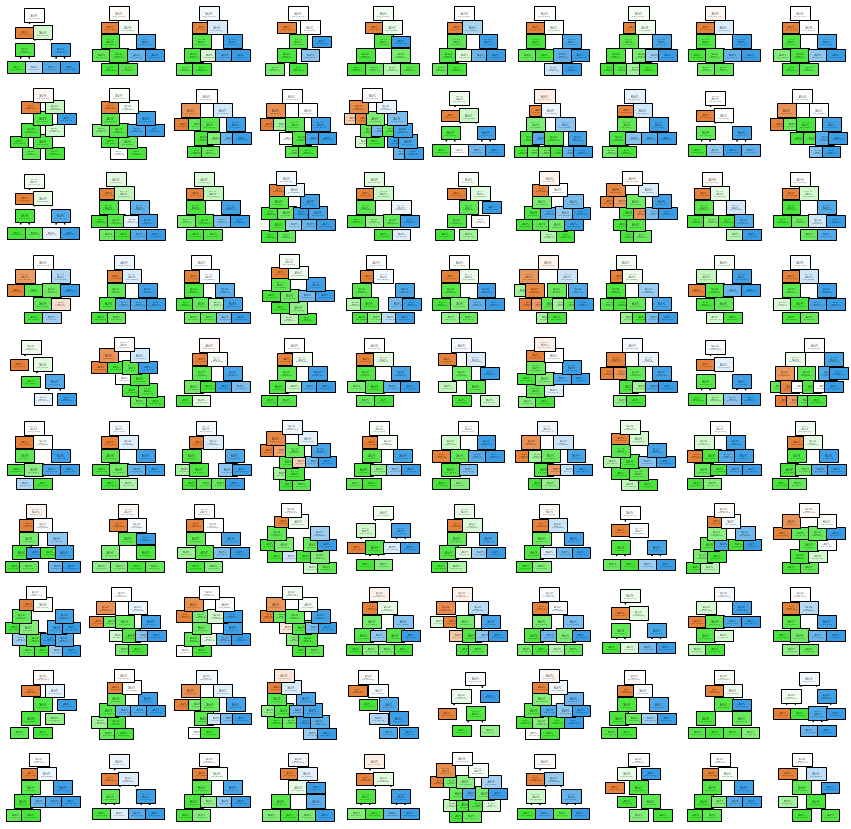

In [5]:
safeRFModel = SafeRandomForestClassifier(n_estimators=100)  # (criterion="entropy")

safeRFModel.fit(X, y)

print(f"Training set accuracy in this safe case is {safeRFModel.score(X,y)}")
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
for row in range(10):
    for column in range(10):
        whichTree = 10 * row + column
        treeRowCol = safeRFModel.estimators_[whichTree]
        _ = plot_tree(treeRowCol, filled=True, ax=ax[row][column], fontsize=1)

## Using the save and reporting functionality¶

In [6]:
safeRFModel.save(name="testSaveRF.pkl")
safeRFModel.preliminary_check()
safeRFModel.request_release("testSaveRF.pkl")

Model parameters are within recommended ranges.



## The checkfile reports any warnings and reccomendations in JSON format

In [7]:
!echo "contents of checkfile are"; cat *_check*ile.json

contents of checkfile are
{
    "researcher": "andy",
    "model_type": "RandomForestClassifier",
    "model_save_file": "testSaveRF.pkl",
    "details": "Model parameters are within recommended ranges.\n",
    "k_anonymity": "1",
    "recommendation": "Run file testSaveRF.pkl through next step of checking procedure",
    "timestamp": "2022-09-01 15:24:05"
}

## Putting it all together
-Don't forget to import the SafeModel classes.

In [8]:
from safemodel.safemodel import SafeModel
from safemodel.classifiers import SafeRandomForestClassifier

safeRFModel = SafeRandomForestClassifier(n_estimators=100)  # (criterion="entropy")
safeRFModel.fit(X, y)
safeRFModel.save(name="testSaveRF.pkl")
safeRFModel.preliminary_check()
safeRFModel.request_release("testSaveRF.pkl")

- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.
Changed parameter min_samples_leaf = 5.

Model parameters are within recommended ranges.



## Examine the checkfile contents


In [9]:
!echo "contents of checkfile are"; cat *_check*ile.json

contents of checkfile are
{
    "researcher": "andy",
    "model_type": "RandomForestClassifier",
    "model_save_file": "testSaveRF.pkl",
    "details": "Model parameters are within recommended ranges.\n",
    "k_anonymity": "1",
    "recommendation": "Run file testSaveRF.pkl through next step of checking procedure",
    "timestamp": "2022-09-01 15:24:05"
}{
    "researcher": "andy",
    "model_type": "RandomForestClassifier",
    "model_save_file": "testSaveRF.pkl",
    "details": "Model parameters are within recommended ranges.\n",
    "k_anonymity": "1",
    "recommendation": "Run file testSaveRF.pkl through next step of checking procedure",
    "timestamp": "2022-09-01 15:24:05"
}